In [8]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

In [4]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/naomi-rlm/Education/main/data/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

C:\Users\naomi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [76]:
!wget -O ccd_sch_029_1617_w_1a_11212017.csv https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
#file_path = r"C:\Users\naomi\Desktop\DATA5100\education\data\ccd_sch_029_1617_w_1a_11212017.csv"
#school_information = pd.read_csv(file_path, encoding="unicode_escape")

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [17]:
school_information.head()

,SCHOOL_YEAR,STATENAME,ST,SCH_NAME,LEA_NAME,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,...,MZIP,LSTREET1,LCITY,LSTATE,LZIP,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,LEVEL
0,2016-2017,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,AL-210,100002,AL-210-0020,1.000020e+10,100277,...,35220,1000 Industrial School Road,Birmingham,AL,35220,Open,3/3/10,Alternative School,4,High
1,2016-2017,ALABAMA,AL,Camps,Alabama Youth Services,AL-210,100002,AL-210-0050,1.000020e+10,101667,...,36057,1601 County Rd. 57,Prattville,AL,36067,Open,3/3/10,Alternative School,4,High
2,2016-2017,ALABAMA,AL,Det Ctr,Alabama Youth Services,AL-210,100002,AL-210-0060,1.000020e+10,101670,...,36057,2109 Bashi Rd Bldg 509,Thomasville,AL,36784,Open,3/3/10,Alternative School,4,High
3,2016-2017,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,AL-210,100002,AL-210-0030,1.000020e+10,101705,...,36057,1000 Industrial School Road,Mount Meigs,AL,36057,Open,3/3/10,Alternative School,4,High
4,2016-2017,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,AL-210,100002,AL-210-0040,1.000020e+10,101706,...,35206,8950 Roebuck Blvd,Birmingham,AL,35206,Open,3/3/10,Alternative School,4,High


In [73]:
pd.set_option('display.max_columns', None)

school_information.head()

,SCHOOL_YEAR,STATENAME,ST,SCH_NAME,LEA_NAME,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MCITY,MSTATE,MZIP,LSTREET1,LCITY,LSTATE,LZIP,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,LEVEL
0,2016-2017,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,AL-210,100002,AL-210-0020,1.000020e+10,100277,P O Box 9486,Birmingham,AL,35220,1000 Industrial School Road,Birmingham,AL,35220,Open,3/3/10,Alternative School,4,High
1,2016-2017,ALABAMA,AL,Camps,Alabama Youth Services,AL-210,100002,AL-210-0050,1.000020e+10,101667,P O Box 66,Mt Meigs,AL,36057,1601 County Rd. 57,Prattville,AL,36067,Open,3/3/10,Alternative School,4,High
2,2016-2017,ALABAMA,AL,Det Ctr,Alabama Youth Services,AL-210,100002,AL-210-0060,1.000020e+10,101670,P O Box 66,Mt Meigs,AL,36057,2109 Bashi Rd Bldg 509,Thomasville,AL,36784,Open,3/3/10,Alternative School,4,High
3,2016-2017,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,AL-210,100002,AL-210-0030,1.000020e+10,101705,P O Box 66,Mount Meigs,AL,36057,1000 Industrial School Road,Mount Meigs,AL,36057,Open,3/3/10,Alternative School,4,High
4,2016-2017,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,AL-210,100002,AL-210-0040,1.000020e+10,101706,8950 Roebuck Blvd,Birmingham,AL,35206,8950 Roebuck Blvd,Birmingham,AL,35206,Open,3/3/10,Alternative School,4,High


In [19]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [20]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102181 non-null  object 
 1   STATENAME            102181 non-null  object 
 2   ST                   102181 non-null  object 
 3   SCH_NAME             102181 non-null  object 
 4   LEA_NAME             102181 non-null  object 
 5   ST_LEAID             102181 non-null  object 
 6   LEAID                102181 non-null  int64  
 7   ST_SCHID             102181 non-null  object 
 8   NCESSCH              102181 non-null  float64
 9   SCHID                102181 non-null  int64  
 10  MSTREET1             102181 non-null  object 
 11  MCITY                102181 non-null  object 
 12  MSTATE               102181 non-null  object 
 13  MZIP                 102181 non-null  int64  
 14  LSTREET1             102181 non-null  object 
 15  LCITY            

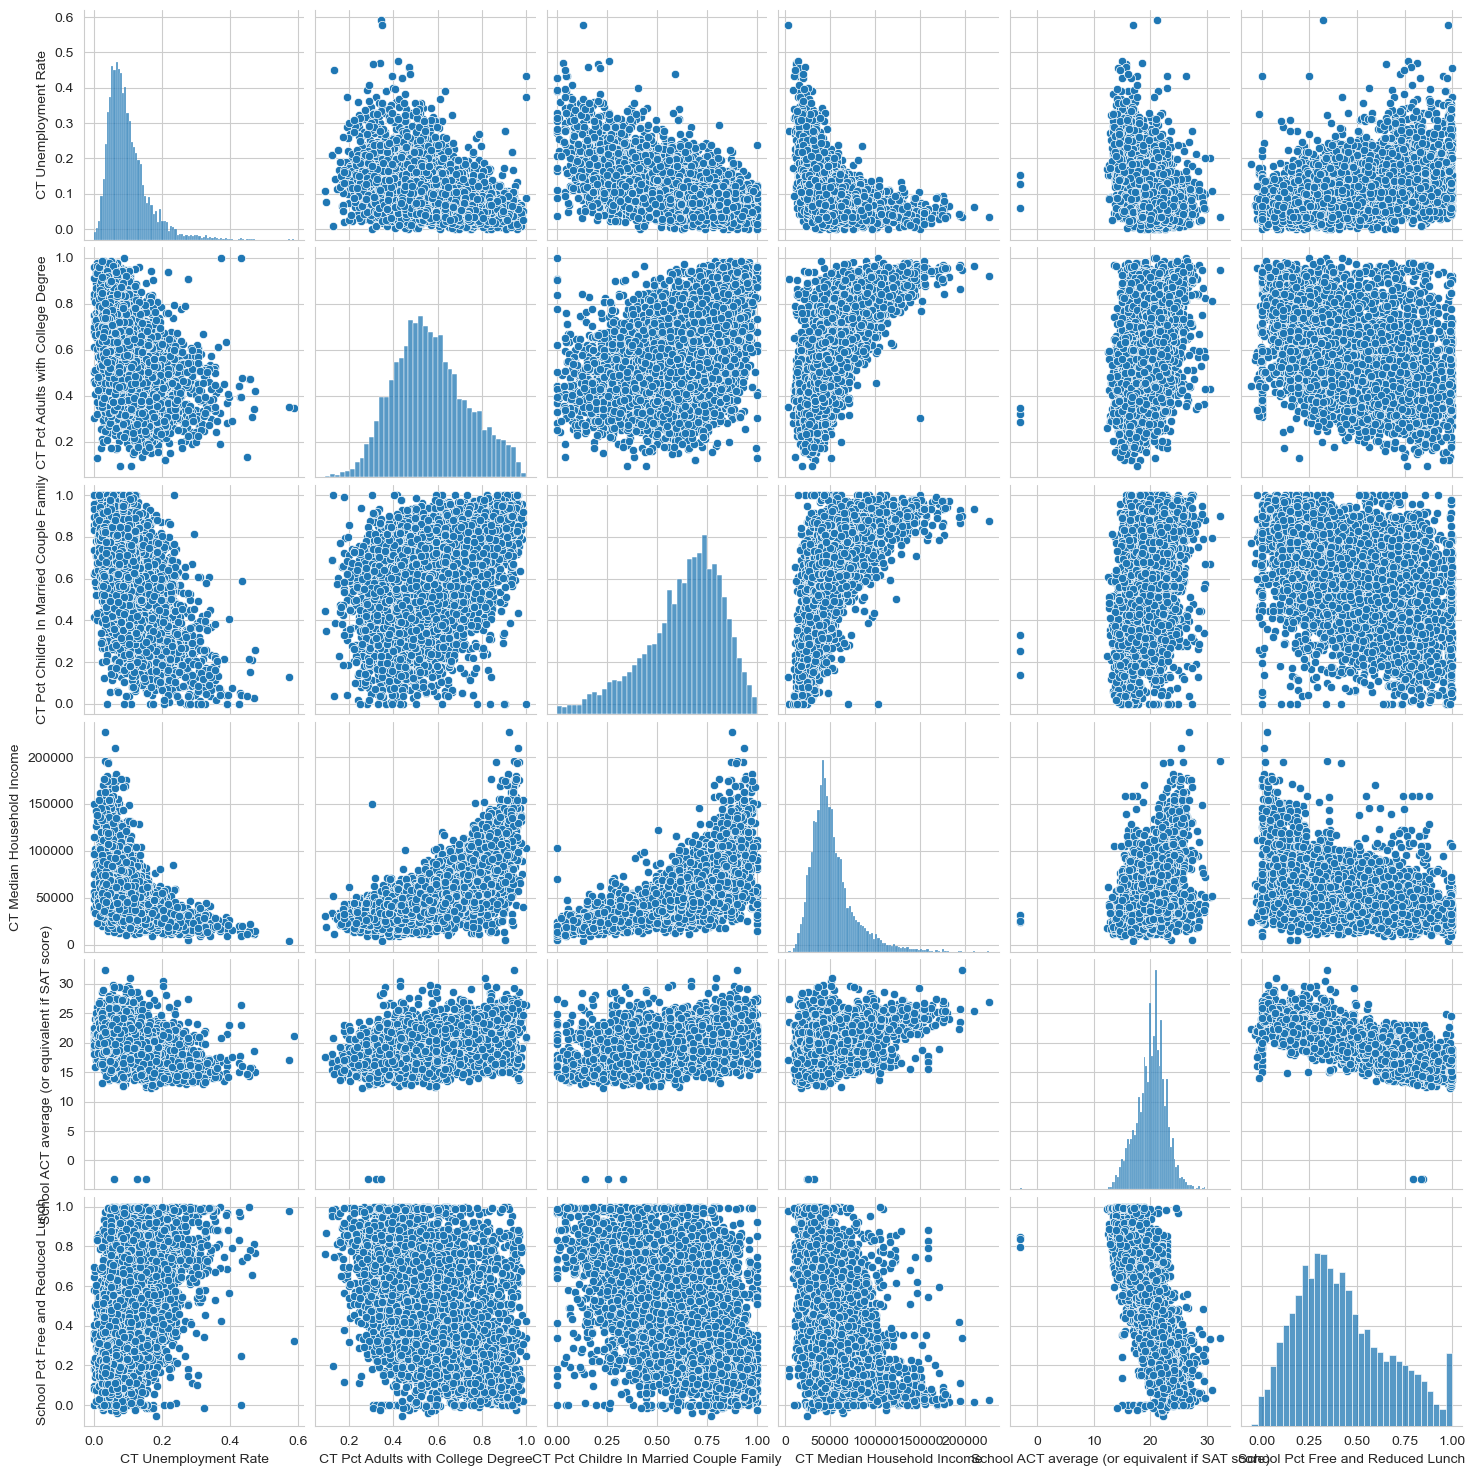

In [21]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

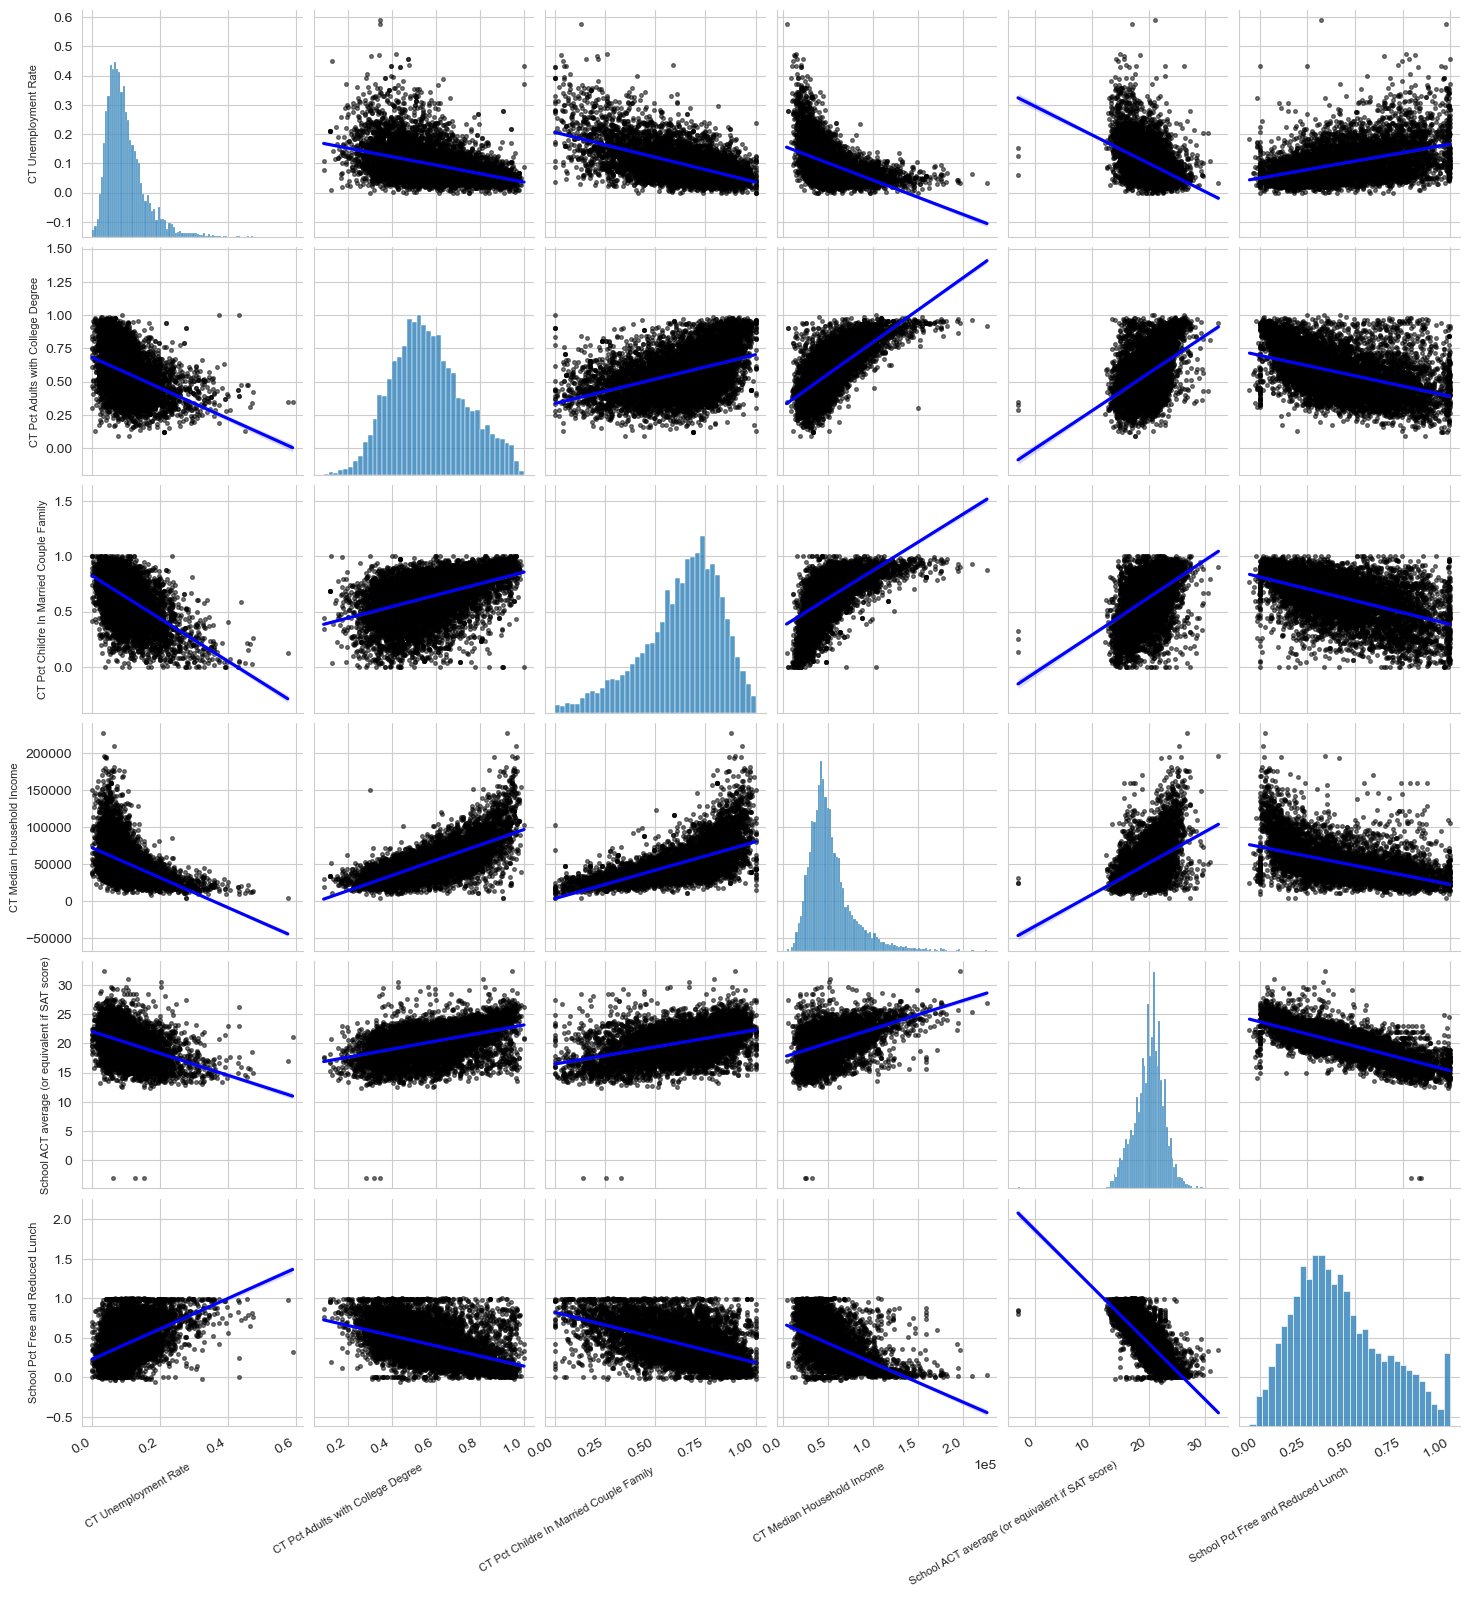

In [23]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()

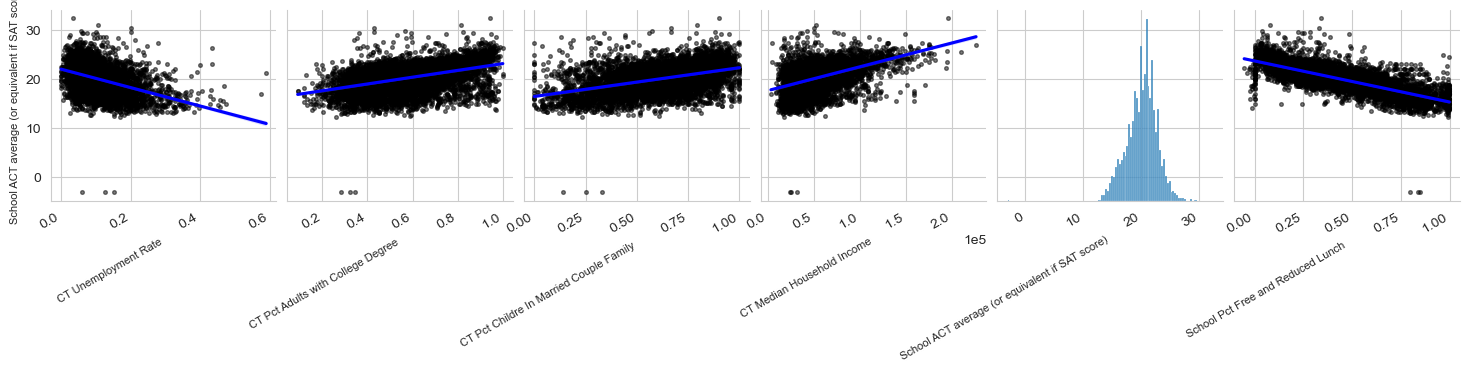

In [24]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

In [27]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL']
]

In [28]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [29]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
    }
)

In [30]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [60]:
school_information.head()

,year,id,state,zip_code,school_type,school_level
0,2016-2017,10000200277.0,AL,35220,Alternative School,High
1,2016-2017,10000201667.0,AL,36067,Alternative School,High
2,2016-2017,10000201670.0,AL,36784,Alternative School,High
3,2016-2017,10000201705.0,AL,36057,Alternative School,High
4,2016-2017,10000201706.0,AL,35206,Alternative School,High


In [61]:
school_information['id'] = school_information['id'].astype('object')

In [62]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102181 non-null  object
 1   id            102181 non-null  object
 2   state         102181 non-null  object
 3   zip_code      102181 non-null  int64 
 4   school_type   102181 non-null  object
 5   school_level  102181 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.7+ MB


In [63]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [64]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,NaN,NaN,NaN,NaN,NaN
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,NaN,NaN,NaN,NaN,NaN
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,NaN,NaN,NaN,NaN,NaN
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,NaN,NaN,NaN,NaN,NaN
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,NaN,NaN,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               0 non-null      object 
 8   state              0 non-null      object 
 9   zip_code           0 non-null      float64
 10  school_type        0 non-null      object 
 11  school_level       0 non-null      object 
dtypes: float64(7), object(5)
memory usage: 748.8+ KB


In [66]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,zip_code
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000,0.0
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651,NaN
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754,NaN
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545,NaN
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501,NaN
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570,NaN
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447,NaN
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729,NaN


In [67]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,zip_code
min,0.00,0.09,0.0,3589.0,-3.07,-0.05,NaN
max,0.59,1.00,1.0,226181.0,32.36,1.00,NaN
